# 逻辑回归实现产品分类

In [1]:
#加载数据、
import pandas as pd
import numpy as np
data = pd.read_csv('task1_data.csv')
data.head()

,尺寸1,尺寸2,y
0,-1.78680,-0.943606,1
1,-1.52284,-1.048610,1
2,-1.31980,-1.324320,1
3,-1.29949,-0.536819,1
4,-1.19797,-0.845908,1


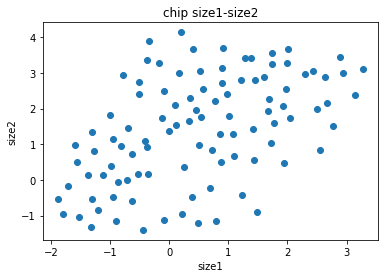

In [2]:
#数据可视化
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'尺寸1'],data.loc[:,'尺寸2'])
plt.title('chip size1-size2')
plt.xlabel('size1')
plt.ylabel('size2')
plt.show()

In [3]:
#建立筛选良品、次品的变量mask
mask = data.loc[:,'y']==1
print(mask)

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: y, Length: 100, dtype: bool


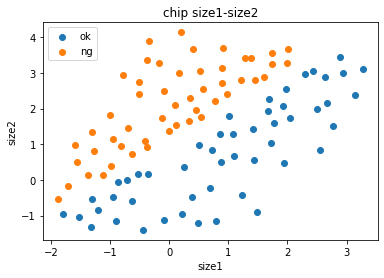

In [7]:
fig1 = plt.figure()
ok = plt.scatter(data.loc[:,'尺寸1'][mask],data.loc[:,'尺寸2'][mask])
ng = plt.scatter(data.loc[:,'尺寸1'][~mask],data.loc[:,'尺寸2'][~mask])

plt.title('chip size1-size2')
plt.xlabel('size1')
plt.ylabel('size2')
plt.legend((ok,ng),('ok','ng'))
plt.show()

In [8]:
#X y赋值
X = data.drop(['y'],axis=1)
y = data.loc[:,'y']
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [9]:
#模型建立与训练
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [10]:
#模型预测
y_predict = model.predict(X)
print(y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
#模型评估
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

1.0


In [12]:
X_test = np.array([[1,10]])
#测试样本预测
y_test_p = model.predict(X_test)
print('ok' if y_test_p==1 else 'ng')

ng


D:\anaconda\envs\env_ml\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

In [10]:
#获取边界函数的参数
print(model.intercept_)
print(model.coef_)

[2.7887966]
[[ 2.73058015 -2.82554755]]


In [11]:
theta0 = model.intercept_[0]
theta1, theta2 = model.coef_[0][0],model.coef_[0][1]
print(theta0,theta1,theta2)

2.7887965961686616 2.730580148169416 -2.825547547161019


In [12]:
X1 = data.loc[:,'尺寸1']
print(X1)

0    -1.78680
1    -1.52284
2    -1.31980
3    -1.29949
4    -1.19797
       ...   
95    1.60446
96    1.74325
97    1.74449
98    1.98679
99    2.00533
Name: 尺寸1, Length: 100, dtype: float64


In [13]:
#计算边界函数上对应的X2
X2_new = -(theta0+theta1*X1)/theta2
print(X2_new)

0    -0.739752
1    -0.484664
2    -0.288448
3    -0.268820
4    -0.170713
        ...   
95    2.537527
96    2.671652
97    2.672851
98    2.907007
99    2.924924
Name: 尺寸1, Length: 100, dtype: float64


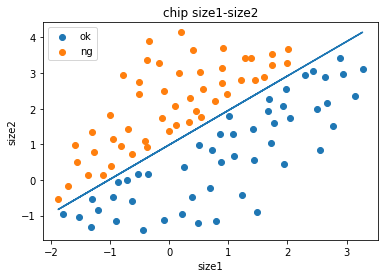

In [14]:
fig3 = plt.figure()
ok = plt.scatter(data.loc[:,'尺寸1'][mask],data.loc[:,'尺寸2'][mask])
ng = plt.scatter(data.loc[:,'尺寸1'][~mask],data.loc[:,'尺寸2'][~mask])
plt.plot(X1,X2_new)
plt.title('chip size1-size2')
plt.xlabel('size1')
plt.ylabel('size2')
plt.legend((ok,ng),('ok','ng'))
plt.show()

![materials](materials2.png)